In [1]:
import cv2
import numpy as np


In [2]:
global_image_path = 'driver.jpg'
global_image = cv2.imread(global_image_path)
cv2.imshow('Global Image with Eye Detection', global_image)
gray_image = cv2.cvtColor(global_image, cv2.COLOR_BGR2GRAY)


In [3]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


In [4]:
eye_images = []
for (x, y, w, h) in eyes:
    eye_region = gray_image[y:y + h, x:x + w]
    # Resize the extracted eye region to 64x64
    eye_resized = cv2.resize(eye_region, (64, 64))
    eye_images.append(eye_resized)


In [5]:
import cv2
import matplotlib.pyplot as plt

global_image_path = 'STAGE/driver.jpg'  # Replace with the actual path to your global image
global_image = cv2.imread(global_image_path)
gray_image = cv2.cvtColor(global_image, cv2.COLOR_BGR2GRAY)

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in eyes:
    cv2.rectangle(global_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
global_image_rgb = cv2.cvtColor(global_image, cv2.COLOR_BGR2RGB)

# Display the global image with rectangles around the detected eyes using matplotlib
plt.imshow(global_image_rgb)
plt.axis('off')
plt.show()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

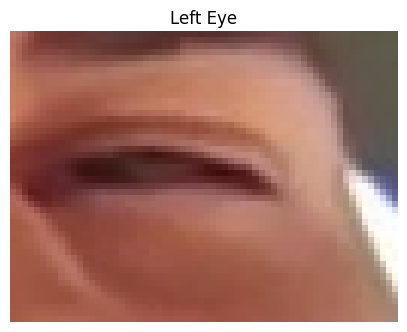

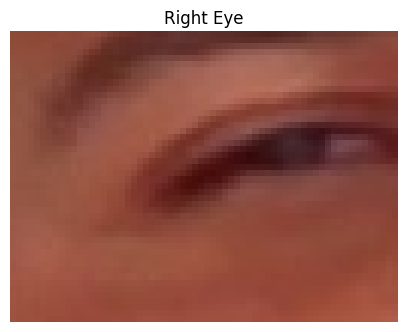

In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load the image using OpenCV
global_image_path = 'driver.jpg'  # Replace with the actual path to your global image
global_image = cv2.imread(global_image_path)

# Convert the image to grayscale for eye detection
gray_image = cv2.cvtColor(global_image, cv2.COLOR_BGR2GRAY)

# Initialize the face detector and eye detector from dlib
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(".\\dlib_shape_predictor\\shape_predictor_68_face_landmarks.dat")
# Detect faces in the image
faces = face_detector(gray_image)

# Lists to store the left and right eye images
left_eye_images = []
right_eye_images = []

# Check if at least one face is detected
if len(faces) > 0:
    face = faces[0]  # Assuming there is only one face in the image

    # Detect eyes for the first face detected
    landmarks = predictor(gray_image, face)

    # Get the coordinates of the left and right eyes in the landmarks
    left_eye_x = landmarks.part(45).x
    left_eye_y = landmarks.part(45).y
    right_eye_x = landmarks.part(36).x
    right_eye_y = landmarks.part(36).y

    # Define the size of the cropped eye regions
    eye_width = 64
    eye_height = 48

    # Crop and store the left and right eye images
    left_eye_images.append(global_image[left_eye_y - eye_height // 2:left_eye_y + eye_height // 2,
                                       left_eye_x - eye_width // 2:left_eye_x + eye_width // 2])

    right_eye_images.append(global_image[right_eye_y - eye_height // 2:right_eye_y + eye_height // 2,
                                        right_eye_x - eye_width // 2:right_eye_x + eye_width // 2])

    # Display the left eye image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(left_eye_images[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Left Eye')
    plt.show()

    # Display the right eye image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(right_eye_images[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Right Eye')
    plt.show()

# Note: Make sure to replace "path_to_dlib_model.dat" with the actual path to the pre-trained dlib model file.


Left Eye EAR: 0.21310017746222182
Right Eye EAR: 0.1874085142663273


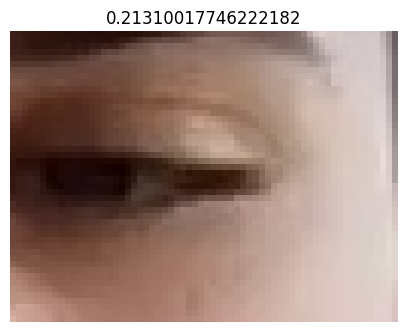

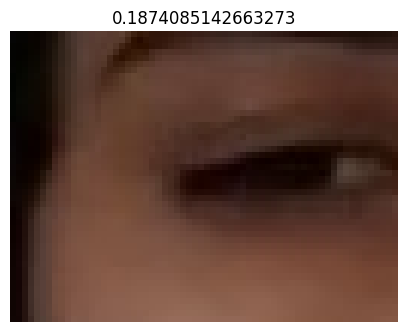

In [ ]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt

def eye_aspect_ratio(eye_landmarks):
    # Calculate the euclidean distances between the two sets of vertical eye landmarks
    a = np.linalg.norm(np.array([eye_landmarks[1].x, eye_landmarks[1].y]) - np.array([eye_landmarks[5].x, eye_landmarks[5].y]))
    b = np.linalg.norm(np.array([eye_landmarks[2].x, eye_landmarks[2].y]) - np.array([eye_landmarks[4].x, eye_landmarks[4].y]))

    # Calculate the euclidean distance between the horizontal eye landmark
    c = np.linalg.norm(np.array([eye_landmarks[0].x, eye_landmarks[0].y]) - np.array([eye_landmarks[3].x, eye_landmarks[3].y]))

    # Calculate the EAR
    ear = (a + b) / (2.0 * c)

    return ear


# Load the image using OpenCV
global_image_path = 'driver2.jpg'  # Replace with the actual path to your global image
global_image = cv2.imread(global_image_path)

# Convert the image to grayscale for eye detection
if global_image is not None:
    gray_image = cv2.cvtColor(global_image, cv2.COLOR_BGR2GRAY)

# Initialize the face detector and eye detector from dlib
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("dlib_shape_predictor\shape_predictor_68_face_landmarks.dat")

# Detect faces in the image
faces = face_detector(gray_image)

# Lists to store the left and right eye images
left_eye_images = []
right_eye_images = []

# Check if at least one face is detected
if len(faces) > 0:
    face = faces[0]  # Assuming there is only one face in the image

    # Detect eyes for the first face detected
    landmarks = predictor(gray_image, face)

    # Get the coordinates of the left and right eyes in the landmarks
    left_eye_x = landmarks.part(45).x
    left_eye_y = landmarks.part(45).y
    right_eye_x = landmarks.part(36).x
    right_eye_y = landmarks.part(36).y

    # Define the size of the cropped eye regions
    eye_width = 64
    eye_height = 48

    # Crop and store the left and right eye images
    left_eye_images.append(global_image[left_eye_y - eye_height // 2:left_eye_y + eye_height // 2,
                                       left_eye_x - eye_width // 2:left_eye_x + eye_width // 2])

    right_eye_images.append(global_image[right_eye_y - eye_height // 2:right_eye_y + eye_height // 2,
                                        right_eye_x - eye_width // 2:right_eye_x + eye_width // 2])

    # Calculate EAR for the left eye
    left_eye_landmarks = landmarks.parts()[36:42]  # Landmarks 36 to 41 correspond to the right eye in dlib
    left_eye_ear = eye_aspect_ratio(left_eye_landmarks)

    # Calculate EAR for the right eye
    right_eye_landmarks = landmarks.parts()[42:48]  # Landmarks 42 to 47 correspond to the left eye in dlib
    right_eye_ear = eye_aspect_ratio(right_eye_landmarks)

    print(f"Left Eye EAR: {left_eye_ear}")
    print(f"Right Eye EAR: {right_eye_ear}")

# Note: Make sure to replace "path_to_dlib_model.dat" with the actual path to the pre-trained dlib model file.
    # Display the left eye image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(left_eye_images[0], cv2.COLOR_BGR2RGB))
    plt.savefig('opopop')
    plt.axis('off')
    plt.title(left_eye_ear)
    plt.show()

    # Display the right eye image
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(right_eye_images[0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(right_eye_ear)
    plt.show()
    